# imports, start

In [1]:
%config Completer.use_jedi = False

In [2]:
import requests
import json
import pandas as pd
import os
import rasterio

In [3]:
raster_coords = pd.read_csv('data/bounding_boxes_coordinates')
raster_coords.set_index('index', inplace=True)

# Requests

In [4]:
def get_polygon_from_adress_params(params):
    """
    From an adress, get the coordinates and the polygon of the buildings
    """
    diccie = {}
    request = requests.get(
        "https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
        params=params).content
    jayson = json.loads(request)
    adress_obj = jayson['adresMatches'][0]['adresseerbareObjecten']

    adress_objects = jayson['adresMatches'][0]['adresseerbareObjecten']
    polygons = []
    for obj in adress_objects:
        if obj['objectType'] == 'gebouweenheid':
            polygons.append(get_polygon_from_detail_url_gebouweenheid(obj['detail']))
    return polygons

In [5]:
def request_json_content(url: str, params: dict) -> dict:
    request = requests(url, params)
    content = request.content
    jayson = json.loads(content)
    return jayson

In [6]:
def get_polygon_from_detail_url_gebouweenheid(url):
    request = requests.get(url).content
    jayson = json.loads(request)
    request_poly = requests.get(jayson['gebouw']['detail']).content
    jayson_poly = json.loads(request_poly)
    poly = jayson_poly['geometriePolygoon']['polygon']['coordinates']
    print(jayson_poly['geometriePolygoon']['polygon'])
    return poly


In [101]:
params = {"postcode": 9000, "straatnaam": "Sint-Michielsplein", "huisnummer": 4 }
polygons = get_polygon_from_adress_params(params)
polygons

[]

In [72]:
params

{'postcode': 9000, 'straatnaam': 'Sint-Michielsplein', 'huisnummer': 4}

In [73]:
request = requests.get(
        "https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
        params=params).content
jayson = json.loads(request)

In [74]:
jayson

{'adresMatches': [{'identificator': {'id': 'https://data.vlaanderen.be/id/adres/246354',
    'naamruimte': 'https://data.vlaanderen.be/id/adres',
    'objectId': '246354',
    'versieId': '2016-12-19T14:43:33+01:00'},
   'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/246354',
   'gemeente': {'objectId': '44021',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/gemeenten/44021',
    'gemeentenaam': {'geografischeNaam': {'spelling': 'Gent', 'taal': 'nl'}}},
   'postinfo': {'objectId': '9000',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/postinfo/9000'},
   'straatnaam': {'objectId': '71628',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/straatnamen/71628',
    'straatnaam': {'geografischeNaam': {'spelling': 'Sint-Michielsplein',
      'taal': 'nl'}}},
   'huisnummer': '4',
   'volledigAdres': {'geografischeNaam': {'spelling': 'Sint-Michielsplein 4, 9000 Gent',
     'taal': 'nl'}},
   'adresPositie': {'point': {'coordinates': [104460.1

# getting the right file

## getting the file number

In [75]:
coords = polygons[0][0][0]

In [76]:
x, y = coords

In [77]:
for xx in raster_coords.columns:
    xx = [int(s) for s in xx.strip('()').split(', ')]
    if (x > float(xx[0])) & (x <= float(xx[1])):
        print(xx)

[98000, 145000]


In [78]:
def find_index(coord, index):
    for i in index:
        list_i = [int(s) for s in i.strip('()').split(', ')]
        if (coord > float(list_i[0])) & (coord <= float(list_i[1])):
            return i

In [79]:
ind = find_index(y, raster_coords.index)
col = find_index(x, raster_coords.columns)

In [80]:
k = str(raster_coords.loc[ind, col])

In [81]:
if len(k) < 2:
    k = '0' + k

In [82]:
k

'22'

## Creating or downloading the file

In [16]:
cwd = os.getcwd()

In [17]:
cwd

'C:\\Users\\simon\\PycharmProjects\\3D_houses'

In [18]:
data_dir = os.path.join(cwd, 'data')
data_dir

'C:\\Users\\simon\\PycharmProjects\\3D_houses\\data'

if not os.path.exists(k_dir):
    print('not')
    os.makedirs(k_dir)

In [19]:
k

'25'

In [20]:
tif_folder = os.path.join(data_dir, 'tif_files\\GeoTIFF')
tif_folder

'C:\\Users\\simon\\PycharmProjects\\3D_houses\\data\\tif_files\\GeoTIFF'

In [21]:
k_tif_dsm = f'DHMVIIDSMRAS1m_k{k}.tif'
k_tif_dtm = f'DHMVIIDTMRAS1m_k{k}.tif'

In [22]:
k_DSM_tif_loc = os.path.join(tif_folder, k_tif_dsm)
k_DTM_tif_loc = os.path.join(tif_folder, k_tif_dtm)
#r'C:\Users\simon\PycharmProjects\3D_houses\data\1\DSM\GeoTIFF\DHMVIIDSMRAS1m_k01.tif'
#DSM_tif = rasterio.open(DSM_tif_loc)

In [23]:
k_DSM_tif_loc

'C:\\Users\\simon\\PycharmProjects\\3D_houses\\data\\tif_files\\GeoTIFF\\DHMVIIDSMRAS1m_k25.tif'

In [24]:
k

'25'

In [25]:
if not os.path.exists(k_DSM_tif_loc):
    
tried to get the data without downloading the whole file
Connecting all code


IndentationError: expected an indented block (<ipython-input-25-9f5410cb8940>, line 3)

In [86]:
DSM_link = f'https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dsm-raster-1m/DHMVIIDSMRAS1m_k43.zip'
DTM_link = f'https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dtm-raster-1m/DHMVIIDTMRAS1m_k{k}.zip'
#r = requests.get(DSM_link, allow_redirects=True)
#open('C:\\Users\\simon\\PycharmProjects\\3D_houses\\data\\tif_files\\GeoTIFF\\DHMVIIDSMRAS1m_k25.tif', 'wb').write(r.content)

76884480

In [ ]:
from csv import StringIO 

In [ ]:
import requests, zipfile
r = requests.get(DSM_link, stream=True)
z = zipfile.ZipFile(StringIO(r.content))
z.extractall()

In [103]:
DSM_link

'https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dsm-raster-1m/DHMVIIDSMRAS1m_k43.zip'

In [102]:
import requests, zipfile, io
r = requests.get(DSM_link)
z = zipfile.ZipFile(io.BytesIO(r.content))


In [91]:
zip_folder = os.path.join(data_dir, 'zip')

In [92]:
zip_folder

'C:\\Users\\simon\\PycharmProjects\\3D_houses\\data\\zip'

In [93]:
z.extractall(zip_folder)

In [97]:
z.filelist

[<ZipInfo filename='DHMVII_vdc_k43.zip' compress_type=deflate external_attr=0x20 file_size=22187 compress_size=21168>,
 <ZipInfo filename='Gebruiksvoorwaarden_Digitaal_Hoogtemodel_Vlaanderen_II_DSM_raster_1_m.pdf' compress_type=deflate external_attr=0x20 file_size=10789 compress_size=9054>,
 <ZipInfo filename='GeoTIFF/' external_attr=0x10>,
 <ZipInfo filename='GeoTIFF/DHMVIIDSMRAS1m_k43.tif' compress_type=deflate external_attr=0x20 file_size=78181007 compress_size=76130507>,
 <ZipInfo filename='Leesmij_DHMVII.pdf' compress_type=deflate external_attr=0x20 file_size=426330 compress_size=397471>,
 <ZipInfo filename='Meta_Digitaal_Hoogtemodel_Vlaanderen_II_DSM_raster_1_m.pdf' compress_type=deflate external_attr=0x20 file_size=320529 compress_size=317963>,
 <ZipInfo filename='Meta_Digitaal_Hoogtemodel_Vlaanderen_II_DSM_raster_1_m.xml' compress_type=deflate external_attr=0x20 file_size=60688 compress_size=6882>]

In [100]:
z.extract('GeoTIFF/DHMVIIDSMRAS1m_k43.tif', path=zip_folder)

'C:\\Users\\simon\\PycharmProjects\\3D_houses\\data\\zip\\GeoTIFF\\DHMVIIDSMRAS1m_k43.tif'

# Masking

In [26]:
import fiona
import rasterio.mask
from shapely import geometry

In [27]:
polygons[0][0]

[[213930.91167144477, 191966.81875929236],
 [213920.23103143275, 191982.57882330567],
 [213917.59141543508, 191980.78995930403],
 [213919.34565543383, 191978.20128730312],
 [213918.36875943094, 191977.53927130252],
 [213922.18226343393, 191971.9121352993],
 [213919.04447143525, 191969.78656729683],
 [213924.10175143927, 191962.2029512897],
 [213930.91167144477, 191966.81875929236]]

In [28]:
polies = []
for pol in polygons:
    polies.append(geometry.Polygon(pol[0]))

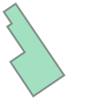

In [29]:
polies[0]

In [30]:
polygons[0][0]

[[213930.91167144477, 191966.81875929236],
 [213920.23103143275, 191982.57882330567],
 [213917.59141543508, 191980.78995930403],
 [213919.34565543383, 191978.20128730312],
 [213918.36875943094, 191977.53927130252],
 [213922.18226343393, 191971.9121352993],
 [213919.04447143525, 191969.78656729683],
 [213924.10175143927, 191962.2029512897],
 [213930.91167144477, 191966.81875929236]]

In [31]:
poly = geometry.Polygon(polygons[0][0])

In [32]:
poly.bounds[:2]

(213917.59141543508, 191962.2029512897)

In [33]:
polygons = polygons[0]

polygons = polygons['polygon']

In [34]:
polygons

[[[213930.91167144477, 191966.81875929236],
  [213920.23103143275, 191982.57882330567],
  [213917.59141543508, 191980.78995930403],
  [213919.34565543383, 191978.20128730312],
  [213918.36875943094, 191977.53927130252],
  [213922.18226343393, 191971.9121352993],
  [213919.04447143525, 191969.78656729683],
  [213924.10175143927, 191962.2029512897],
  [213930.91167144477, 191966.81875929236]]]

In [35]:
with rasterio.open(k_DSM_tif_loc) as src:
    out_image_dsm, out_transform = rasterio.mask.mask(src, [poly], crop=True, filled = True, pad = True)
    out_meta = src.meta

In [36]:
with rasterio.open(k_DTM_tif_loc) as src:
    out_image_dtm, out_transform = rasterio.mask.mask(src, [poly], crop=True, filled = True, pad = True)
    out_meta = src.meta

In [37]:
image_chm = out_image_dtm - out_image_dsm

In [38]:
import matplotlib.pyplot as plt
from rasterio.plot import show
import plotly

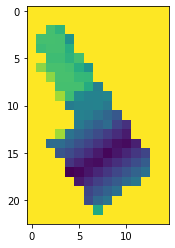

In [39]:
show(image_chm)
plt.show()

# plotly

In [40]:
import plotly.graph_objects as go

%matplotlib notebook

In [41]:
%matplotlib notebook

In [42]:
plotly.offline.init_notebook_mode (connected = True)

plotly.offline.init_notebook_mode (connected = True)

In [43]:
import numpy as np

In [44]:
image_chm = image_chm[0]*-1

In [57]:
fig = go.Figure(data = [go.Surface(z=np.flip(image_chm, axis=1))])
fig.update_layout(title='Mt Bruno Elevation', autosize=True)
fig.show()

In [46]:
import psutil

In [48]:
fig.write_image('data/image1.png')

In [ ]:
z_data.values

In [ ]:
z2 = image_chm[0]
z1 = z_data.values

In [ ]:
z_data.values.shape

In [105]:
str(params)

"{'postcode': 4730, 'straatnaam': 'Burgstraße', 'huisnummer': 103}"

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

# 3d mesh

In [49]:
import numpy as np

In [50]:
image_chm.shape

(23, 15)

In [54]:
x = np.arange(0, image_chm.shape[0])
y = np.arange(0, image_chm.shape[1])

In [55]:
xx, yy = np.meshgrid(x, y)

In [56]:
fig = go.Figure(data=[go.Mesh3d(x=xx, y=yy, z=image_chm, color='lightpink', opacity=0.50)])
fig.show()

In [ ]:
go

In [ ]:
DSM_tif.read()

In [ ]:
show(DSM_tif)

#### Dowload link example

In [ ]:
https://downloadagiv.blob.core.windows.net/dhm-vlaanderen-ii-dsm-raster-1m/DHMVIIDSMRAS1m_k25.zip

In [ ]:
k_folder

In [ ]:
os.path.exists(k_folder)